In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras import layers

### 讀取資料

In [3]:
data = pd.read_csv("kc_house_data.csv")

In [4]:
data.shape

(21613, 21)

In [5]:
pd.options.display.max_columns =25
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.dtypes ## check data type

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 資料處理

In [7]:
data['year'] = pd.to_numeric(data['date'].str.slice(0,4))
data['month'] = pd.to_numeric(data['date'].str.slice(4,6))
data['day'] = pd.to_numeric(data['date'].str.slice(6,8))

In [8]:
#data.drop(['id'], axis="columns",inplace=True) 
data.drop(['date'], axis="columns", inplace=True) ## inplace是將更新後的資料存回原本放回得地方
data.drop(['id'], axis="columns" , inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


### 分割資料集
將資料分成 訓練資料、驗證資料、測試資料

In [9]:
data_num = data.shape[0] 

In [10]:
index = np.random.permutation(data_num)

In [11]:
train_index = index[:int(data_num*0.6)]
val_index = index[int(data_num*0.6):int(data_num*0.8)]
test_index = index[int(data_num*0.8):]

In [12]:
train_data = data.loc[train_index]
val_data = data.loc[val_index]
test_data = data.loc[test_index]

In [13]:
train_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
16553,320000.0,4,2.50,3130,5200,2.0,0,0,3,7,3130,0,2005,0,98042,47.3828,-122.098,3020,5200,2015,4,7
13996,160000.0,2,1.00,1070,4200,1.0,0,0,4,6,1070,0,1983,0,98002,47.3336,-122.215,1150,4200,2015,1,29
19423,320000.0,4,2.25,2310,7490,2.0,0,0,3,8,2310,0,1980,0,98055,47.4379,-122.192,2310,8480,2014,5,9
15095,500000.0,4,2.50,2230,8560,2.0,0,0,3,8,2230,0,2002,0,98059,47.4877,-122.143,2400,7756,2014,12,17
10311,399900.0,3,1.75,1260,12750,1.0,0,0,3,7,1260,0,1979,0,98034,47.7289,-122.233,1460,7865,2015,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16307,288000.0,3,2.50,1520,3593,2.0,0,0,3,7,1520,0,2004,0,98038,47.3842,-122.042,1610,3612,2014,7,3
11795,688888.0,3,3.25,2580,9825,1.5,0,1,4,9,1760,820,1978,0,98027,47.5314,-122.054,2140,10270,2015,3,19
19777,2641100.0,5,4.25,4660,16200,2.0,0,2,3,11,4660,0,2005,0,98004,47.6326,-122.216,3340,16200,2015,2,12
4497,444900.0,4,2.50,3120,7448,2.0,0,0,3,9,3120,0,1998,0,98042,47.3645,-122.126,2980,8102,2015,3,18


In [14]:
train_val_data = pd.concat([train_data,val_data])

In [15]:
mean = train_val_data.mean()
std = train_val_data.std()

In [16]:
train_data = (train_data-mean)/std
val_data = (val_data-mean)/std     ##標準化

### 建立Numpy array格式的訓練資料

In [17]:
x_train = np.array(train_data.drop('price', axis='columns'))
y_train = np.array(train_data['price'])
x_val = np.array(val_data.drop('price', axis = 'columns'))
y_val = np.array(val_data['price'])

In [18]:
x_train.shape

(12967, 21)

In [19]:
x_val.shape

(4323, 21)

### 建立並訓練網路模型

In [20]:
model = keras.Sequential(name='model-1')

In [21]:
model.add(layers.Dense(64, activation='relu', input_shape=(21,)))

In [22]:
model.add(layers.Dense(64, activation='relu'))

In [23]:
model.add(layers.Dense(1))

In [24]:
model.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


#### 設定優化器、損失函數、指標函數

In [25]:
model.compile(keras.optimizers.Adam(0.001),
             loss='mse',
             metrics=[keras.metrics.MeanAbsoluteError()])

In [27]:
model_dir = 'lab2-logs/models/'
os.makedirs(model_dir)

In [28]:
log_dir = os.path.join('lab2-logs','model-1') ##TensorBoard回條函數會幫忙記錄訓練資訊，並存成TensorBoard的記錄檔
model_cbk = keras.callbacks.TensorBoard(log_dir = log_dir)

In [29]:
model_mckp = keras.callbacks.ModelCheckpoint(model_dir+'/Best-model-1.h5', ##filepath
                                            monitor='val_mean_absolute_error',  ## 被監測的資料
                                            save_best_only=True, ##如果 save_best_only=True， 被监测数据的最佳模型就不会被覆盖
                                            mode='min') 
# {auto, min, max} 的其中之一。 
#如果 save_best_only=True，那么是否覆盖保存文件的决定就取决于被监测数据的最大或者最小值。 
#对于 val_acc，模式就会是 max，而对于 val_loss，模式就需要是 min，等等。 
#在 auto 模式中，方向会自动从被监测的数据的名字中判断出来。

### 訓練網路模型

In [30]:
history = model.fit(x_train,y_train,
                    batch_size = 64,
                    epochs=300,
                    validation_data=(x_val,y_val),
                    callbacks=[model_cbk,model_mckp])

Epoch 1/300
203/203 [==============================] - 1s 2ms/step - loss: 0.4978 - mean_absolute_error: 0.4130 - val_loss: 0.2246 - val_mean_absolute_error: 0.3059
Epoch 2/300
203/203 [==============================] - 0s 1ms/step - loss: 0.2183 - mean_absolute_error: 0.2873 - val_loss: 0.2032 - val_mean_absolute_error: 0.2749
Epoch 3/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1741 - mean_absolute_error: 0.2568 - val_loss: 0.1718 - val_mean_absolute_error: 0.2595
Epoch 4/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1689 - mean_absolute_error: 0.2487 - val_loss: 0.1621 - val_mean_absolute_error: 0.2405
Epoch 5/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1465 - mean_absolute_error: 0.2342 - val_loss: 0.1487 - val_mean_absolute_error: 0.2365
Epoch 6/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1458 - mean_absolute_error: 0.2320 - val_loss: 0.1427 - val_mean_absolute_error: 0.2295
Epoch 7/30

203/203 [==============================] - 0s 1ms/step - loss: 0.0367 - mean_absolute_error: 0.1384 - val_loss: 0.1266 - val_mean_absolute_error: 0.2105
Epoch 100/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0360 - mean_absolute_error: 0.1373 - val_loss: 0.1301 - val_mean_absolute_error: 0.2111
Epoch 101/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0369 - mean_absolute_error: 0.1382 - val_loss: 0.1329 - val_mean_absolute_error: 0.2156
Epoch 102/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0359 - mean_absolute_error: 0.1370 - val_loss: 0.1276 - val_mean_absolute_error: 0.2094
Epoch 103/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0340 - mean_absolute_error: 0.1349 - val_loss: 0.1296 - val_mean_absolute_error: 0.2123
Epoch 104/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0357 - mean_absolute_error: 0.1367 - val_loss: 0.1342 - val_mean_absolute_error: 0.2112
Epoch 105/30

203/203 [==============================] - 0s 1ms/step - loss: 0.0288 - mean_absolute_error: 0.1254 - val_loss: 0.1328 - val_mean_absolute_error: 0.2155
Epoch 198/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0298 - mean_absolute_error: 0.1259 - val_loss: 0.1316 - val_mean_absolute_error: 0.2159
Epoch 199/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0270 - mean_absolute_error: 0.1212 - val_loss: 0.1371 - val_mean_absolute_error: 0.2183
Epoch 200/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0274 - mean_absolute_error: 0.1234 - val_loss: 0.1371 - val_mean_absolute_error: 0.2171
Epoch 201/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0310 - mean_absolute_error: 0.1285 - val_loss: 0.1337 - val_mean_absolute_error: 0.2168
Epoch 202/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0300 - mean_absolute_error: 0.1269 - val_loss: 0.1379 - val_mean_absolute_error: 0.2174
Epoch 203/30

203/203 [==============================] - 0s 1ms/step - loss: 0.0228 - mean_absolute_error: 0.1130 - val_loss: 0.1377 - val_mean_absolute_error: 0.2180
Epoch 296/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0234 - mean_absolute_error: 0.1146 - val_loss: 0.1390 - val_mean_absolute_error: 0.2178
Epoch 297/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0234 - mean_absolute_error: 0.1142 - val_loss: 0.1398 - val_mean_absolute_error: 0.2166
Epoch 298/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0245 - mean_absolute_error: 0.1171 - val_loss: 0.1402 - val_mean_absolute_error: 0.2191
Epoch 299/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0245 - mean_absolute_error: 0.1173 - val_loss: 0.1397 - val_mean_absolute_error: 0.2168
Epoch 300/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0248 - mean_absolute_error: 0.1170 - val_loss: 0.1425 - val_mean_absolute_error: 0.2211


In [31]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

### 繪製loss折線圖

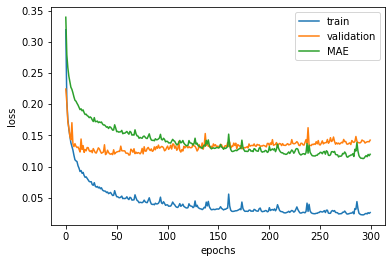

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.plot(history.history['mean_absolute_error'], label='MAE')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

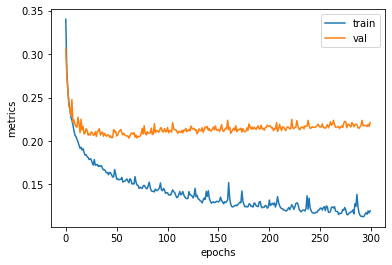

In [33]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='val')
plt.xlabel('epochs')
plt.ylabel('metrics')
plt.legend(loc='upper right')

In [34]:
model.load_weights('lab2-logs/models/Best-model-1.h5')
y_test = np.array(test_data['price'])

In [35]:
test_data = (test_data - mean) / std
x_test = np.array(test_data.drop(['price'], axis='columns'))

In [36]:
y_predict = model.predict(x_test)

In [37]:
y_predict ## 標準化的預測值

array([[ 0.11188452],
       [-0.40252876],
       [-0.08939715],
       ...,
       [ 2.4131298 ],
       [-0.0789133 ],
       [-0.86786604]], dtype=float32)

In [38]:
y_predict = np.reshape(y_predict * std['price'] + mean['price'], y_test.shape)

In [39]:
y_predict

array([ 581644.6 ,  392392.38,  507593.25, ..., 1428270.8 ,  511450.25,
        221195.19], dtype=float32)

In [40]:
percentage_error = np.mean(np.abs(y_test - y_predict)) / np.mean(y_test) * 100

In [41]:
print("Model-1 Percentage Error:{:.2f}%".format(percentage_error))

Model-1 Percentage Error:13.70%


In [42]:
y_test ## 真實房屋價格

array([ 420000.,  400000.,  600000., ..., 1350000.,  612000.,  271000.])

In [43]:
y_predict ## 預測房屋價格

array([ 581644.6 ,  392392.38,  507593.25, ..., 1428270.8 ,  511450.25,
        221195.19], dtype=float32)

In [44]:
%load_ext tensorboard

### 修改神經網路（優化）
* 減少模型大小
* 加入權重正規化
* 加入Dropout

### model_2(減少模型大小)

In [45]:
model_2 = keras.Sequential(name='model-2')

In [46]:
model_2.add(layers.Dense(16, activation='relu', input_shape=(21,))) ##降低hiddden layer number

In [47]:
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))

In [48]:
model_2.compile(keras.optimizers.Adam(0.001),
               loss = keras.losses.MeanSquaredError(),
               metrics = [keras.metrics.MeanAbsoluteError()])

In [49]:
log_dir = os.path.join('lab2-logs', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir = log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir+'/Best-model-2.h5',
                                            monitor='val_mean_absolute_error',
                                            save_best_only=True,
                                            mode='min')

In [50]:
model_2.fit(x_train, y_train, 
           batch_size=64,
           epochs=200,
           validation_data=(x_val,y_val),
           callbacks=[model_cbk,model_mckp])

Epoch 1/200
203/203 [==============================] - 1s 2ms/step - loss: 0.8452 - mean_absolute_error: 0.6579 - val_loss: 0.3510 - val_mean_absolute_error: 0.3994
Epoch 2/200
203/203 [==============================] - 0s 1ms/step - loss: 0.3354 - mean_absolute_error: 0.3693 - val_loss: 0.2757 - val_mean_absolute_error: 0.3420
Epoch 3/200
203/203 [==============================] - 0s 1ms/step - loss: 0.2628 - mean_absolute_error: 0.3266 - val_loss: 0.2449 - val_mean_absolute_error: 0.3186
Epoch 4/200
203/203 [==============================] - 0s 1ms/step - loss: 0.2333 - mean_absolute_error: 0.3067 - val_loss: 0.2230 - val_mean_absolute_error: 0.3018
Epoch 5/200
203/203 [==============================] - 0s 2ms/step - loss: 0.2223 - mean_absolute_error: 0.2967 - val_loss: 0.2114 - val_mean_absolute_error: 0.2886
Epoch 6/200
203/203 [==============================] - 0s 1ms/step - loss: 0.2166 - mean_absolute_error: 0.2880 - val_loss: 0.1999 - val_mean_absolute_error: 0.2844
Epoch 7/20

203/203 [==============================] - 0s 1ms/step - loss: 0.0771 - mean_absolute_error: 0.1796 - val_loss: 0.1168 - val_mean_absolute_error: 0.2007
Epoch 100/200
203/203 [==============================] - 0s 1ms/step - loss: 0.0759 - mean_absolute_error: 0.1787 - val_loss: 0.1131 - val_mean_absolute_error: 0.1981
Epoch 101/200
203/203 [==============================] - 0s 1ms/step - loss: 0.0760 - mean_absolute_error: 0.1800 - val_loss: 0.1132 - val_mean_absolute_error: 0.1981
Epoch 102/200
203/203 [==============================] - 0s 1ms/step - loss: 0.0783 - mean_absolute_error: 0.1801 - val_loss: 0.1148 - val_mean_absolute_error: 0.1995
Epoch 103/200
203/203 [==============================] - 0s 1ms/step - loss: 0.0827 - mean_absolute_error: 0.1830 - val_loss: 0.1143 - val_mean_absolute_error: 0.1992
Epoch 104/200
203/203 [==============================] - 0s 1ms/step - loss: 0.0801 - mean_absolute_error: 0.1820 - val_loss: 0.1133 - val_mean_absolute_error: 0.1985
Epoch 105/20

203/203 [==============================] - 0s 1ms/step - loss: 0.0703 - mean_absolute_error: 0.1745 - val_loss: 0.1055 - val_mean_absolute_error: 0.1935
Epoch 198/200
203/203 [==============================] - 0s 1ms/step - loss: 0.0681 - mean_absolute_error: 0.1720 - val_loss: 0.1099 - val_mean_absolute_error: 0.1939
Epoch 199/200
203/203 [==============================] - 0s 1ms/step - loss: 0.0636 - mean_absolute_error: 0.1678 - val_loss: 0.1126 - val_mean_absolute_error: 0.2004
Epoch 200/200
203/203 [==============================] - 0s 1ms/step - loss: 0.0651 - mean_absolute_error: 0.1708 - val_loss: 0.1074 - val_mean_absolute_error: 0.1954


In [51]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### model_3(加入權重正規化)

In [52]:
model_3 = keras.Sequential(name='model_3')

In [53]:
model_3.add(layers.Dense(64, 
                         kernel_regularizer=keras.regularizers.l2(0.001), 
                         activation='relu', input_shape=(21,)))

In [55]:
model_3.add(layers.Dense(64, 
                         kernel_regularizer=keras.regularizers.l2(0.001), 
                         activation='relu'))

In [56]:
model_3.add(layers.Dense(1))

In [57]:
model_3.compile(keras.optimizers.Adam(0.001),
               loss = keras.losses.MeanSquaredError(),
               metrics= [keras.metrics.MeanAbsoluteError()])

In [58]:
log_dir = os.path.join('lab2-logs','model-3')
model_cbk = keras.callbacks.TensorBoard(log_dir = log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir+'/Best-model-3.h5',
                                            monitor='val_mean_absolute_error',
                                            save_best_only=True,
                                            mode='min')

In [59]:
model_3.fit(x_train,y_train,batch_size=64,epochs=300,validation_data=(x_val,y_val),
           callbacks=[model_cbk,model_mckp])

Epoch 1/300
203/203 [==============================] - 1s 2ms/step - loss: 0.6219 - mean_absolute_error: 0.4221 - val_loss: 0.3117 - val_mean_absolute_error: 0.2890
Epoch 2/300
203/203 [==============================] - 0s 1ms/step - loss: 0.3030 - mean_absolute_error: 0.2835 - val_loss: 0.2753 - val_mean_absolute_error: 0.2723
Epoch 3/300
203/203 [==============================] - 0s 1ms/step - loss: 0.2562 - mean_absolute_error: 0.2635 - val_loss: 0.2490 - val_mean_absolute_error: 0.2566
Epoch 4/300
203/203 [==============================] - 0s 1ms/step - loss: 0.2429 - mean_absolute_error: 0.2571 - val_loss: 0.2488 - val_mean_absolute_error: 0.2675
Epoch 5/300
203/203 [==============================] - 0s 1ms/step - loss: 0.2241 - mean_absolute_error: 0.2441 - val_loss: 0.2504 - val_mean_absolute_error: 0.2679
Epoch 6/300
203/203 [==============================] - 0s 1ms/step - loss: 0.2276 - mean_absolute_error: 0.2450 - val_loss: 0.2233 - val_mean_absolute_error: 0.2410
Epoch 7/30

203/203 [==============================] - 0s 1ms/step - loss: 0.0811 - mean_absolute_error: 0.1620 - val_loss: 0.1440 - val_mean_absolute_error: 0.1947
Epoch 100/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0827 - mean_absolute_error: 0.1640 - val_loss: 0.1372 - val_mean_absolute_error: 0.1927
Epoch 101/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0817 - mean_absolute_error: 0.1636 - val_loss: 0.1398 - val_mean_absolute_error: 0.1913
Epoch 102/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0804 - mean_absolute_error: 0.1621 - val_loss: 0.1427 - val_mean_absolute_error: 0.1920
Epoch 103/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0831 - mean_absolute_error: 0.1629 - val_loss: 0.1436 - val_mean_absolute_error: 0.1940
Epoch 104/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0799 - mean_absolute_error: 0.1594 - val_loss: 0.1363 - val_mean_absolute_error: 0.1865
Epoch 105/30

203/203 [==============================] - 0s 1ms/step - loss: 0.0776 - mean_absolute_error: 0.1615 - val_loss: 0.1455 - val_mean_absolute_error: 0.1926
Epoch 198/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0925 - mean_absolute_error: 0.1688 - val_loss: 0.1318 - val_mean_absolute_error: 0.1892
Epoch 199/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0731 - mean_absolute_error: 0.1579 - val_loss: 0.1429 - val_mean_absolute_error: 0.2032
Epoch 200/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0729 - mean_absolute_error: 0.1587 - val_loss: 0.1395 - val_mean_absolute_error: 0.1905
Epoch 201/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0728 - mean_absolute_error: 0.1578 - val_loss: 0.1335 - val_mean_absolute_error: 0.1897
Epoch 202/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0701 - mean_absolute_error: 0.1535 - val_loss: 0.1346 - val_mean_absolute_error: 0.1886
Epoch 203/30

203/203 [==============================] - 0s 1ms/step - loss: 0.0715 - mean_absolute_error: 0.1587 - val_loss: 0.1390 - val_mean_absolute_error: 0.1908
Epoch 296/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0699 - mean_absolute_error: 0.1567 - val_loss: 0.1390 - val_mean_absolute_error: 0.1988
Epoch 297/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0686 - mean_absolute_error: 0.1543 - val_loss: 0.1353 - val_mean_absolute_error: 0.1923
Epoch 298/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0729 - mean_absolute_error: 0.1590 - val_loss: 0.1483 - val_mean_absolute_error: 0.1910
Epoch 299/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0737 - mean_absolute_error: 0.1578 - val_loss: 0.1352 - val_mean_absolute_error: 0.1904
Epoch 300/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0692 - mean_absolute_error: 0.1545 - val_loss: 0.1332 - val_mean_absolute_error: 0.1880


### model_4(加入Dropout)

In [60]:
model_4 = keras.Sequential(name='model-4')

In [61]:
model_4.add(layers.Dense(64, activation='relu', input_shape=(21,)))

In [63]:
model_4.add(layers.Dropout(0.3))

In [64]:
model_4.add(layers.Dense(64, activation='relu'))

In [65]:
model_4.add(layers.Dropout(0.3))

In [66]:
model_4.add(layers.Dense(1))

In [67]:
model_4.compile(keras.optimizers.Adam(0.001),
               loss = keras.losses.MeanSquaredError(),
               metrics= [keras.metrics.MeanAbsoluteError()])

In [68]:
log_dir = os.path.join('lab2-logs','model-4')
model_cbk = keras.callbacks.TensorBoard(log_dir = log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir+'/Best-model-4.h5',
                                            monitor='val_mean_absolute_error',
                                            save_best_only=True,
                                            mode='min')

In [69]:
model_4.fit(x_train,y_train,
           batch_size=64,
           epochs=300,
           validation_data=(x_val,y_val),
           callbacks=[model_cbk,model_mckp])

Epoch 1/300
203/203 [==============================] - 1s 2ms/step - loss: 0.8210 - mean_absolute_error: 0.5573 - val_loss: 0.2748 - val_mean_absolute_error: 0.3368
Epoch 2/300
203/203 [==============================] - 0s 1ms/step - loss: 0.3853 - mean_absolute_error: 0.3893 - val_loss: 0.2458 - val_mean_absolute_error: 0.3085
Epoch 3/300
203/203 [==============================] - 0s 1ms/step - loss: 0.3144 - mean_absolute_error: 0.3457 - val_loss: 0.2320 - val_mean_absolute_error: 0.3028
Epoch 4/300
203/203 [==============================] - 0s 1ms/step - loss: 0.2800 - mean_absolute_error: 0.3288 - val_loss: 0.2187 - val_mean_absolute_error: 0.2938
Epoch 5/300
203/203 [==============================] - 0s 2ms/step - loss: 0.2479 - mean_absolute_error: 0.3114 - val_loss: 0.1952 - val_mean_absolute_error: 0.2827
Epoch 6/300
203/203 [==============================] - 0s 1ms/step - loss: 0.2631 - mean_absolute_error: 0.3132 - val_loss: 0.2422 - val_mean_absolute_error: 0.2988
Epoch 7/30

203/203 [==============================] - 0s 2ms/step - loss: 0.1088 - mean_absolute_error: 0.2153 - val_loss: 0.1339 - val_mean_absolute_error: 0.2304
Epoch 100/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1215 - mean_absolute_error: 0.2221 - val_loss: 0.1174 - val_mean_absolute_error: 0.2235
Epoch 101/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1157 - mean_absolute_error: 0.2206 - val_loss: 0.1327 - val_mean_absolute_error: 0.2315
Epoch 102/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1328 - mean_absolute_error: 0.2276 - val_loss: 0.1115 - val_mean_absolute_error: 0.2127
Epoch 103/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1182 - mean_absolute_error: 0.2186 - val_loss: 0.1138 - val_mean_absolute_error: 0.2165
Epoch 104/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1194 - mean_absolute_error: 0.2222 - val_loss: 0.1201 - val_mean_absolute_error: 0.2207
Epoch 105/30

203/203 [==============================] - 0s 2ms/step - loss: 0.1105 - mean_absolute_error: 0.2133 - val_loss: 0.1425 - val_mean_absolute_error: 0.2251
Epoch 198/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1127 - mean_absolute_error: 0.2156 - val_loss: 0.1331 - val_mean_absolute_error: 0.2347
Epoch 199/300
203/203 [==============================] - 0s 2ms/step - loss: 0.1051 - mean_absolute_error: 0.2138 - val_loss: 0.1313 - val_mean_absolute_error: 0.2329
Epoch 200/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1065 - mean_absolute_error: 0.2118 - val_loss: 0.1388 - val_mean_absolute_error: 0.2257
Epoch 201/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1103 - mean_absolute_error: 0.2173 - val_loss: 0.1409 - val_mean_absolute_error: 0.2371
Epoch 202/300
203/203 [==============================] - 0s 1ms/step - loss: 0.0988 - mean_absolute_error: 0.2111 - val_loss: 0.1247 - val_mean_absolute_error: 0.2130
Epoch 203/30

203/203 [==============================] - 0s 1ms/step - loss: 0.1123 - mean_absolute_error: 0.2153 - val_loss: 0.1286 - val_mean_absolute_error: 0.2319
Epoch 296/300
203/203 [==============================] - 0s 2ms/step - loss: 0.1049 - mean_absolute_error: 0.2112 - val_loss: 0.1211 - val_mean_absolute_error: 0.2143
Epoch 297/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1163 - mean_absolute_error: 0.2142 - val_loss: 0.1384 - val_mean_absolute_error: 0.2225
Epoch 298/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1134 - mean_absolute_error: 0.2149 - val_loss: 0.1355 - val_mean_absolute_error: 0.2334
Epoch 299/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1182 - mean_absolute_error: 0.2177 - val_loss: 0.1287 - val_mean_absolute_error: 0.2237
Epoch 300/300
203/203 [==============================] - 0s 1ms/step - loss: 0.1066 - mean_absolute_error: 0.2129 - val_loss: 0.1173 - val_mean_absolute_error: 0.2144


In [1]:
%tensorboard --logdir lab2-logs

UsageError: Line magic function `%tensorboard` not found.
